<a href="https://colab.research.google.com/github/Bishal-Nengminja/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

**2. Data Loading**

In [2]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
pd.set_option("display.max_columns", None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**3. Exploratory Data Analysis(EDA)**

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Printing the unique values in columns
numerical_features_list = ["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
  if col not in numerical_features_list:
    print(col,df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------------------------

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Numerical featuer - Analysis**

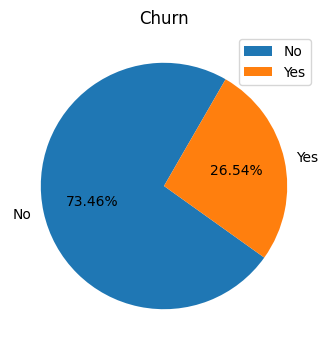

In [10]:
plt.figure(figsize=(5,4))
x = df["Churn"].value_counts().index
y = df["Churn"].value_counts().values
plt.pie(y,labels=x,startangle= 60, autopct="%.2f%%")
plt.title("Churn")
plt.legend()
plt.show()

understand the distribution of the numerical features

In [11]:
def plot_histogram(dataset, columns_name):

  plt.figure(figsize=(5,3))
  sns.histplot(dataset[columns_name], kde=True)
  plt.title(f"Distribution of {columns_name}")

  # calculate the mean and median value for columns
  col_mean = dataset[columns_name].mean()
  col_median = dataset[columns_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, c="red", linestyle="--", label="Mean")
  plt.axvline(col_median, c="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

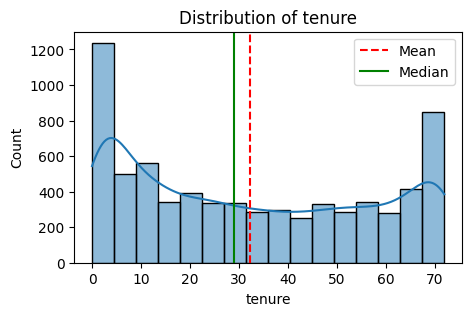

In [12]:
plot_histogram(df, "tenure")

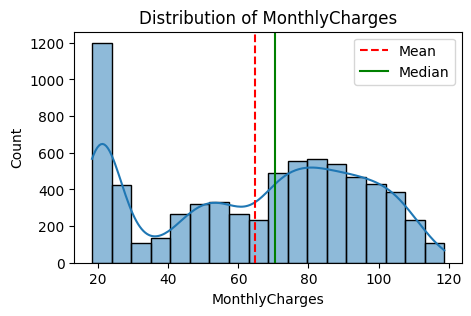

In [13]:
plot_histogram(df, "MonthlyCharges")

In [14]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
len(df[df["TotalCharges"]==" "])

11

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [17]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

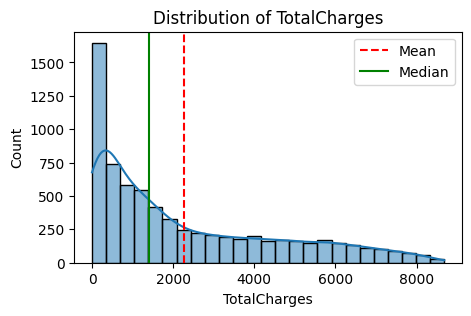

In [18]:
plot_histogram(df, "TotalCharges")

Box plot for numerical features

In [19]:
def plot_boxplot(df, columns_name):

  plt.figure(figsize=(5,3))
  sns.boxplot(x=df[columns_name])
  plt.title(f"Boxplot of {columns_name}")
  plt.xlabel(columns_name)
  plt.show()

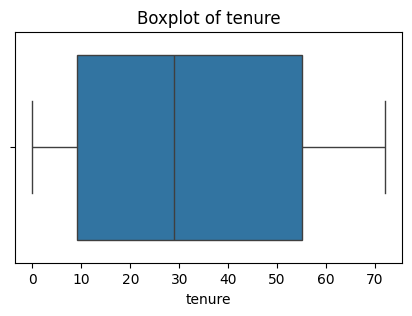

In [20]:
plot_boxplot(df, "tenure")

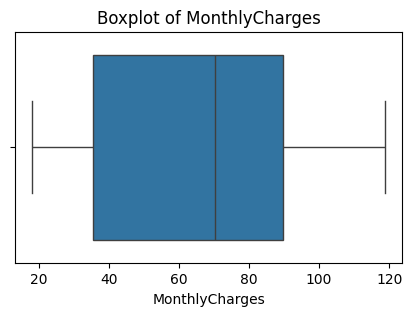

In [21]:

plot_boxplot(df, "MonthlyCharges")

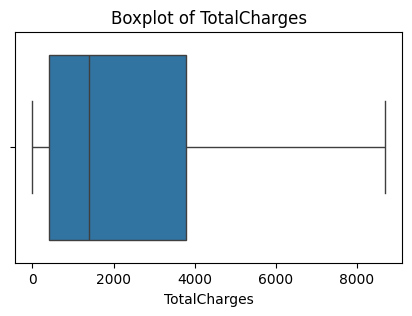

In [22]:
plot_boxplot(df, "TotalCharges")

Correlation Heatmap for numerical columns

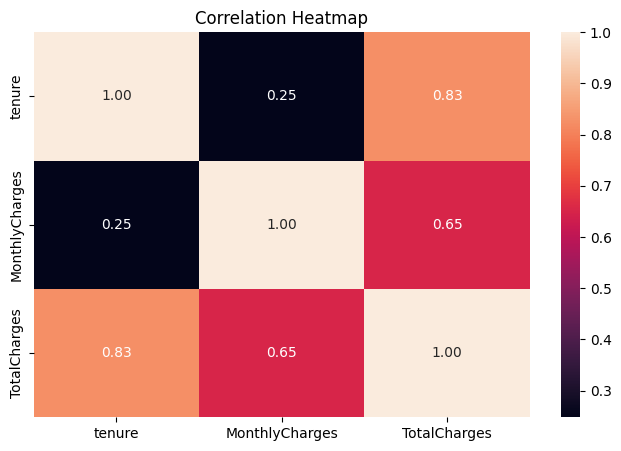

In [23]:
# correlation matrix - heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis\
Counplot for categorical columns

In [24]:
# dropping customerID column cause this is not required for modelling
df = df.drop(columns="customerID")

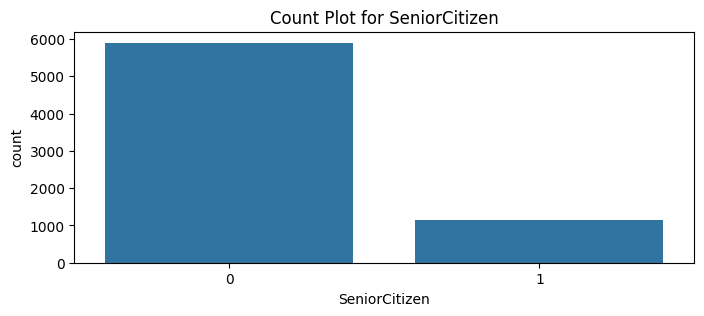

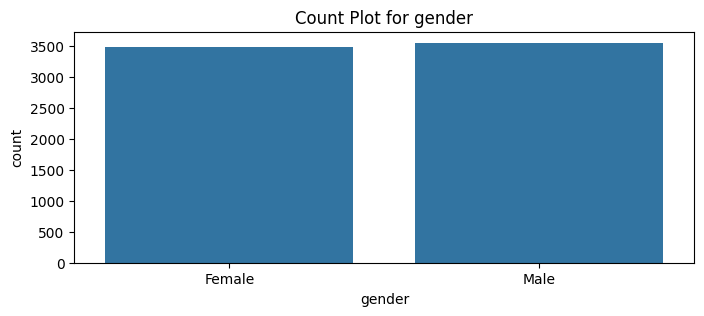

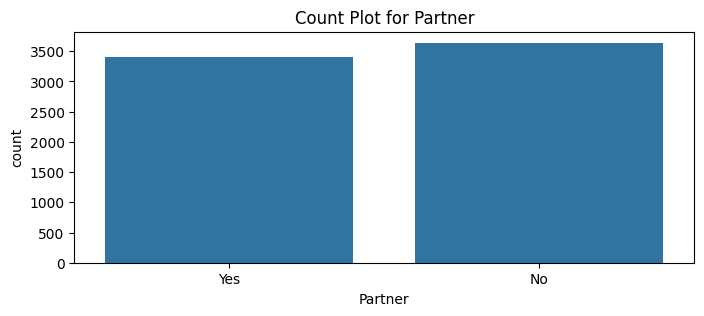

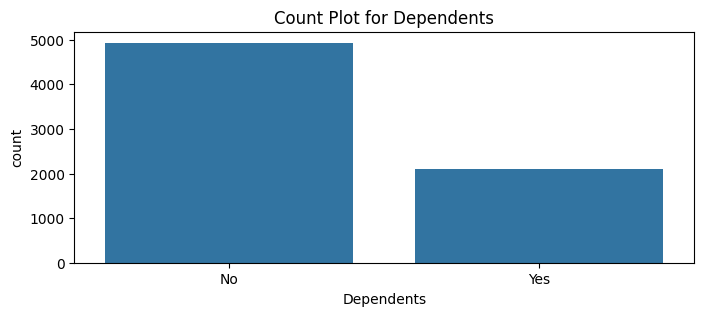

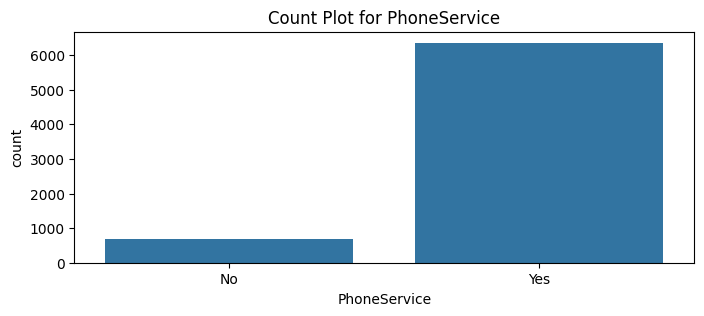

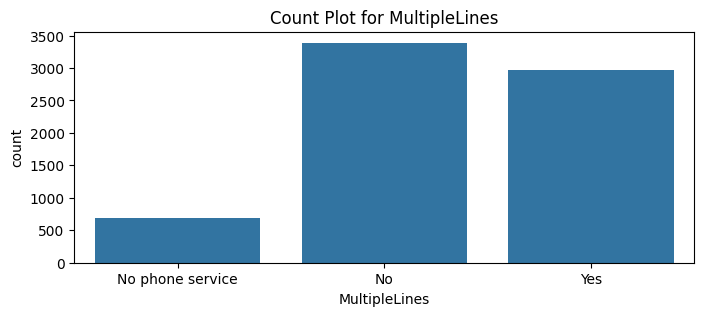

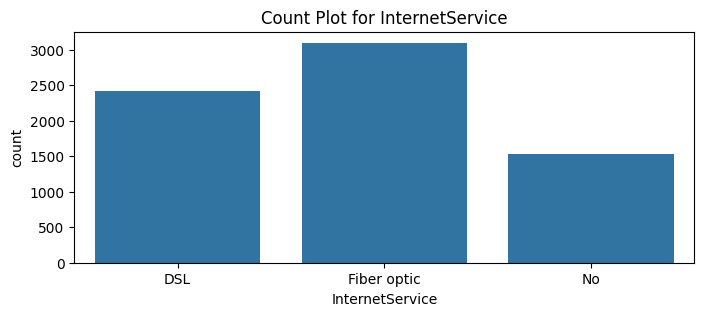

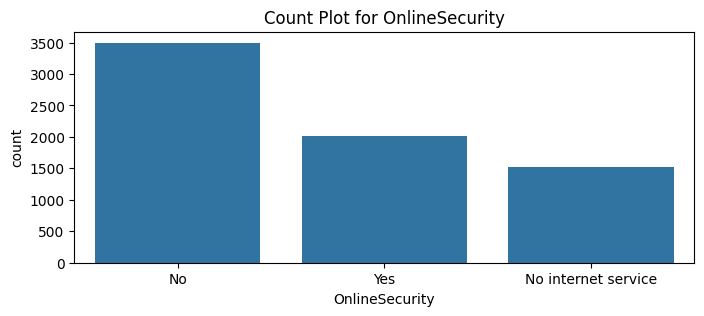

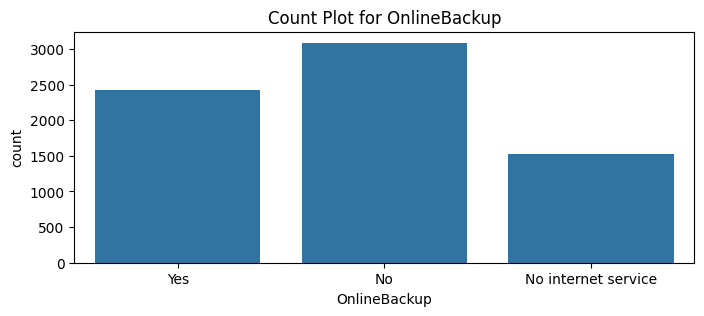

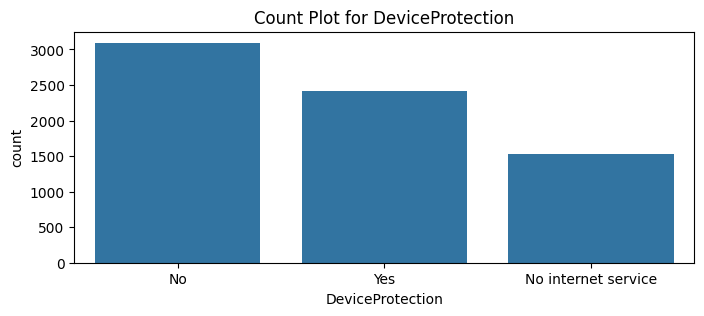

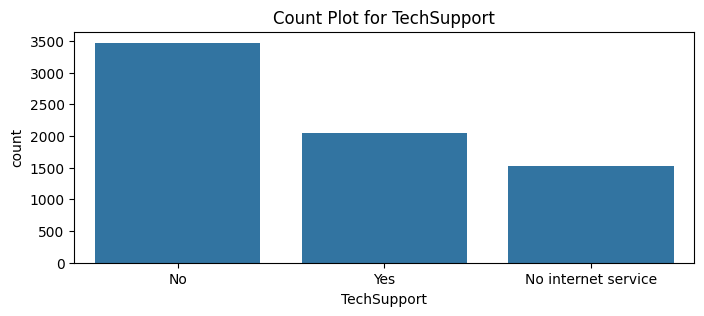

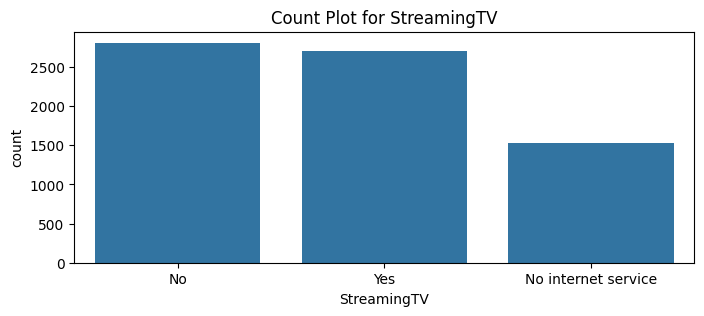

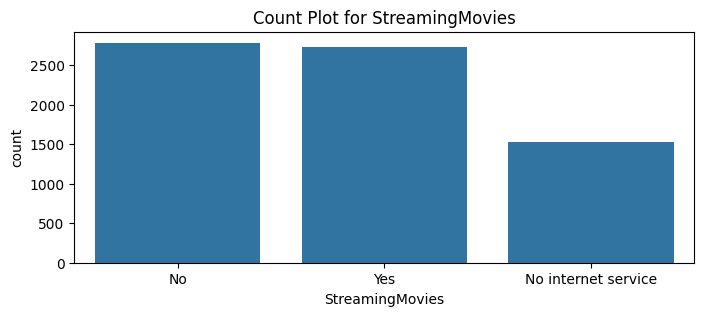

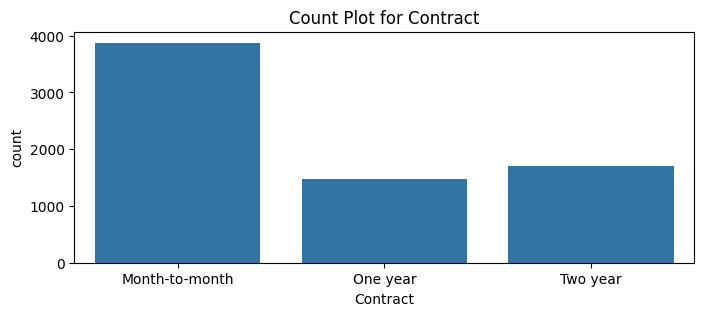

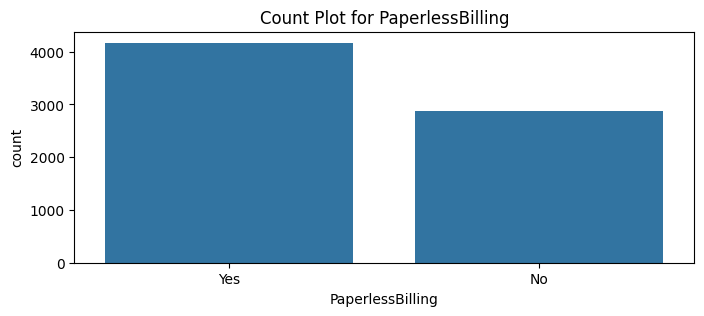

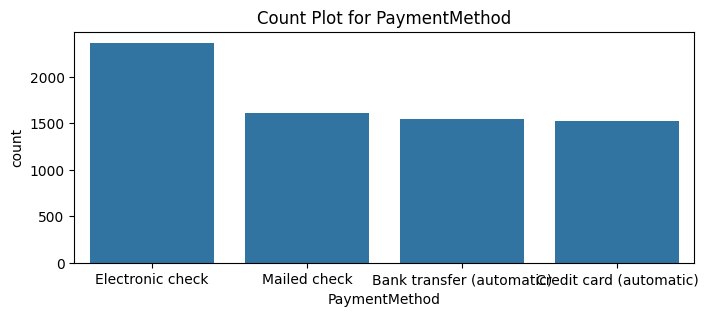

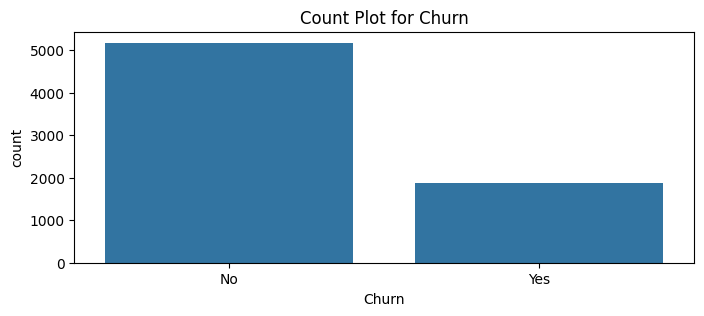

In [25]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols= ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(8, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.show()

**4. Data Cleaning and Preprocessing**

In [26]:
clean_df = df.copy()

In [27]:
clean_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
clean_df.shape

(7043, 20)

In [29]:
clean_df.drop_duplicates(inplace=True)

In [30]:
clean_df.shape

(7021, 20)

In [31]:
clean_df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [32]:
clean_df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [33]:
# Printing the unique values in columns
numerical_features_list = ["tenure","MonthlyCharges","TotalCharges"]
for col in clean_df.columns:
  if col not in numerical_features_list:
    print(col,clean_df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

Target Label Encoding (Churn)\
1 = Yes
 &\
2 = No

In [34]:

clean_df["Churn"] = clean_df["Churn"].replace({"Yes":1, "No":0})

Features Encoding\
Label Encoding

In [35]:
binary_cols_label_encode = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
]

In [36]:
# Initialize a dictionary to save encoders
binary_encoders = {}

# Apply label encoding and store the encoders
for column in binary_cols_label_encode:
  le = LabelEncoder()
  clean_df[column] = le.fit_transform(clean_df[column])
  binary_encoders[column] = le

  # save the encoders to a pickle file
  with open("binary_encoders.pkl","wb") as f:
    pickle.dump(binary_encoders, f)

In [37]:
binary_encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'PaperlessBilling': LabelEncoder()}

Ordinal Encoding

In [38]:
clean_df["Contract"] = clean_df["Contract"].replace({'Month-to-month': 0, 'One year':1, 'Two year':2})

In [39]:
clean_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,1,0,Mailed check,56.95,1889.50,0


OneHotEncoding

In [40]:
nominal_encoders = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaymentMethod'
]

In [41]:
# Dictionary to save encoders
onehot_encoders = {}

for col in nominal_encoders:
    # Updated parameter name for scikit-learn >= 1.6
    ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
    encoded = ohe.fit_transform(clean_df[[col]])

    # Create column names
    encoded_df = pd.DataFrame(
        encoded,
        columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
        index=clean_df.index
    )

    # Update dataframe
    clean_df = pd.concat([clean_df.drop(columns=[col]), encoded_df], axis=1)
    onehot_encoders[col] = ohe

# Save encoders
with open("onehot_encoders.pkl", "wb") as f:
    pickle.dump(onehot_encoders, f)

In [42]:
clean_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,2,1,0,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,84.80,1990.50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1
7039,0,0,1,1,72,1,1,1,103.20,7362.90,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,0,1,1,11,0,0,1,29.60,346.45,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,1,74.40,306.60,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
clean_df.shape

(7021, 30)

In [44]:
clean_df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
Contract,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64


In [45]:
clean_df=clean_df.astype(int)

In [46]:
clean_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29,29,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,56,1889,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,53,108,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


**5. Feature Engineering and Extraction**

In [47]:
clean_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [48]:
cols = ["tenure","MonthlyCharges","TotalCharges"]
ss = StandardScaler()

clean_df[cols]=ss.fit_transform(clean_df[cols])

with open("scaler.pkl","wb") as f:
  pickle.dump(ss,f)

In [49]:
clean_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.282728,0,0,1,-1.176789,-0.995855,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.062387,1,1,0,-0.278879,-0.175276,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,-1.241967,1,0,1,-0.378647,-0.961003,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [50]:
slected_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

correlation = {
    feature: pearsonr(clean_df[feature], clean_df['Churn'])[0]
    for feature in slected_features
}

correlation_df = pd.DataFrame(list(correlation.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
12,InternetService_Fiber optic,0.308170
27,PaymentMethod_Electronic check,0.301544
8,MonthlyCharges,0.194567
7,PaperlessBilling,0.190891
1,SeniorCitizen,0.151619
23,StreamingTV_Yes,0.065032
25,StreamingMovies_Yes,0.063192
11,MultipleLines_Yes,0.041958
5,PhoneService,0.011323
0,gender,-0.008763


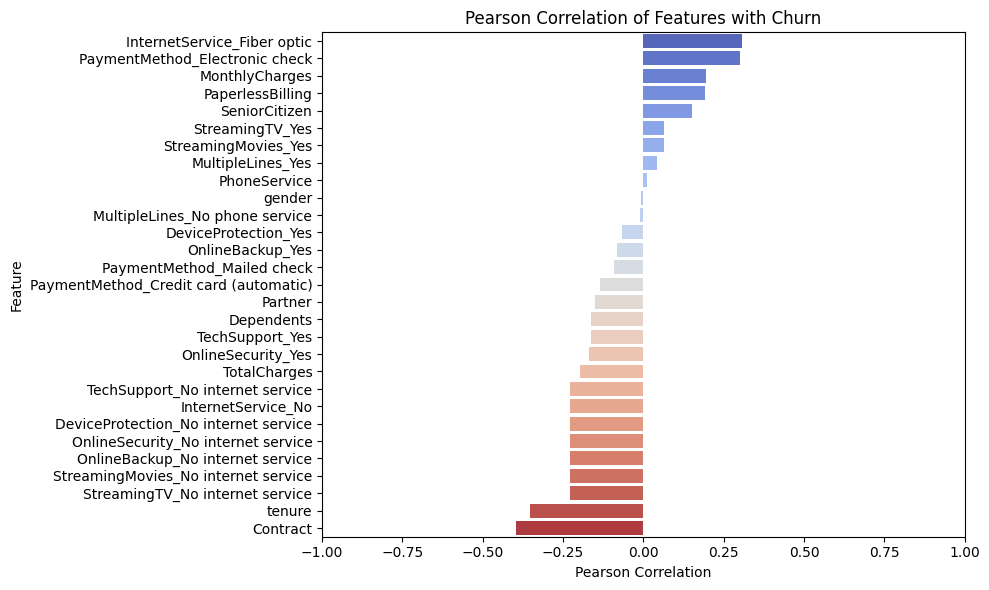

In [51]:
# Sort the dataframe by correlation values
correlation_df = correlation_df.sort_values(by='Pearson Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Pearson Correlation', y='Feature', data=correlation_df, palette='coolwarm')

plt.title('Pearson Correlation of Features with Churn')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.xlim(-1, 1)  # Correlation values range from -1 to 1
plt.tight_layout()
plt.show()

In [52]:
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'Contract',
    'PaperlessBilling',
    'MultipleLines_No phone service',
    'MultipleLines_Yes',
    'InternetService_Fiber optic',
    'InternetService_No',
    'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes',
    'OnlineBackup_No internet service',
    'OnlineBackup_Yes',
    'DeviceProtection_No internet service',
    'DeviceProtection_Yes',
    'TechSupport_No internet service',
    'TechSupport_Yes',
    'StreamingTV_No internet service',
    'StreamingTV_Yes',
    'StreamingMovies_No internet service',
    'StreamingMovies_Yes',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

In [53]:
# Function to calculate chi-square test
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return (phi2corr / min((kcorr-1), (rcorr-1)))**0.5


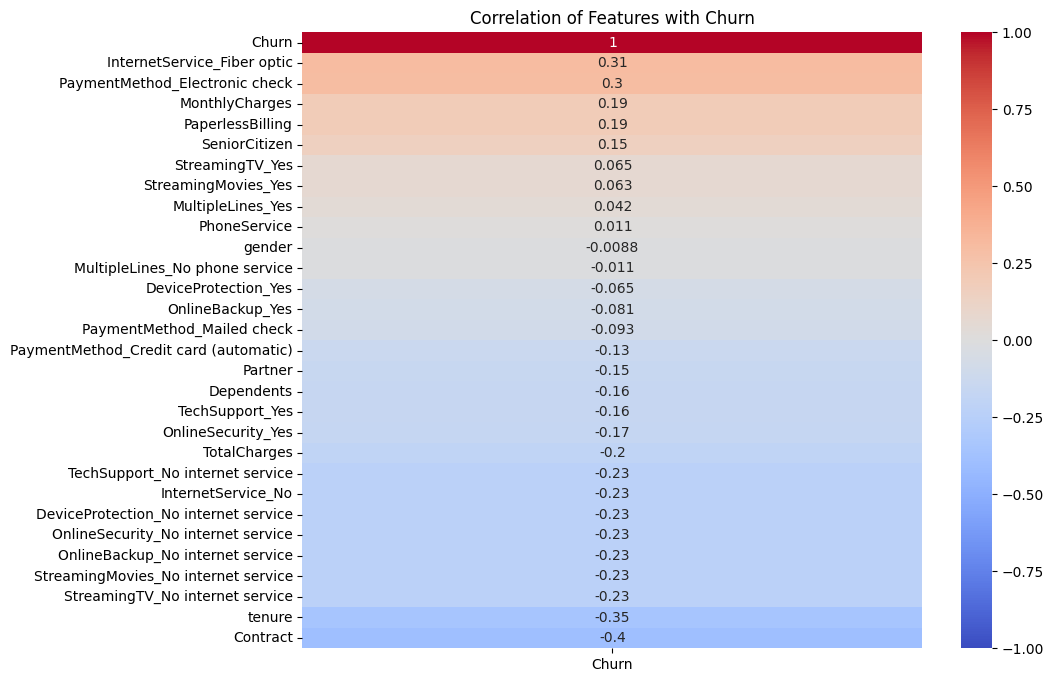

In [54]:
# Numeric correlation matrix including Churn_num
corr_matrix = clean_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

In [55]:
# Calculate Cramér's V between Churn and each categorical feature
cramers_results = {}
for col in categorical_cols:
    confusion_mat = pd.crosstab(clean_df[col], clean_df['Churn'])
    cramers_results[col] = cramers_v(confusion_mat)

# Display results sorted by correlation strength
cramers_df = pd.Series(cramers_results).sort_values(ascending=False)
print("Cramér's V correlation with Churn:")
print(cramers_df)

Cramér's V correlation with Churn:
Contract                                 0.409607
InternetService_Fiber optic              0.307635
PaymentMethod_Electronic check           0.300987
DeviceProtection_No internet service     0.227844
StreamingMovies_No internet service      0.227844
StreamingTV_No internet service          0.227844
OnlineSecurity_No internet service       0.227844
OnlineBackup_No internet service         0.227844
InternetService_No                       0.227844
TechSupport_No internet service          0.227844
PaperlessBilling                         0.190202
OnlineSecurity_Yes                       0.169756
TechSupport_Yes                          0.163157
Dependents                               0.162681
SeniorCitizen                            0.150720
Partner                                  0.148343
PaymentMethod_Credit card (automatic)    0.132748
PaymentMethod_Mailed check               0.091407
OnlineBackup_Yes                         0.079871
StreamingTV_Yes

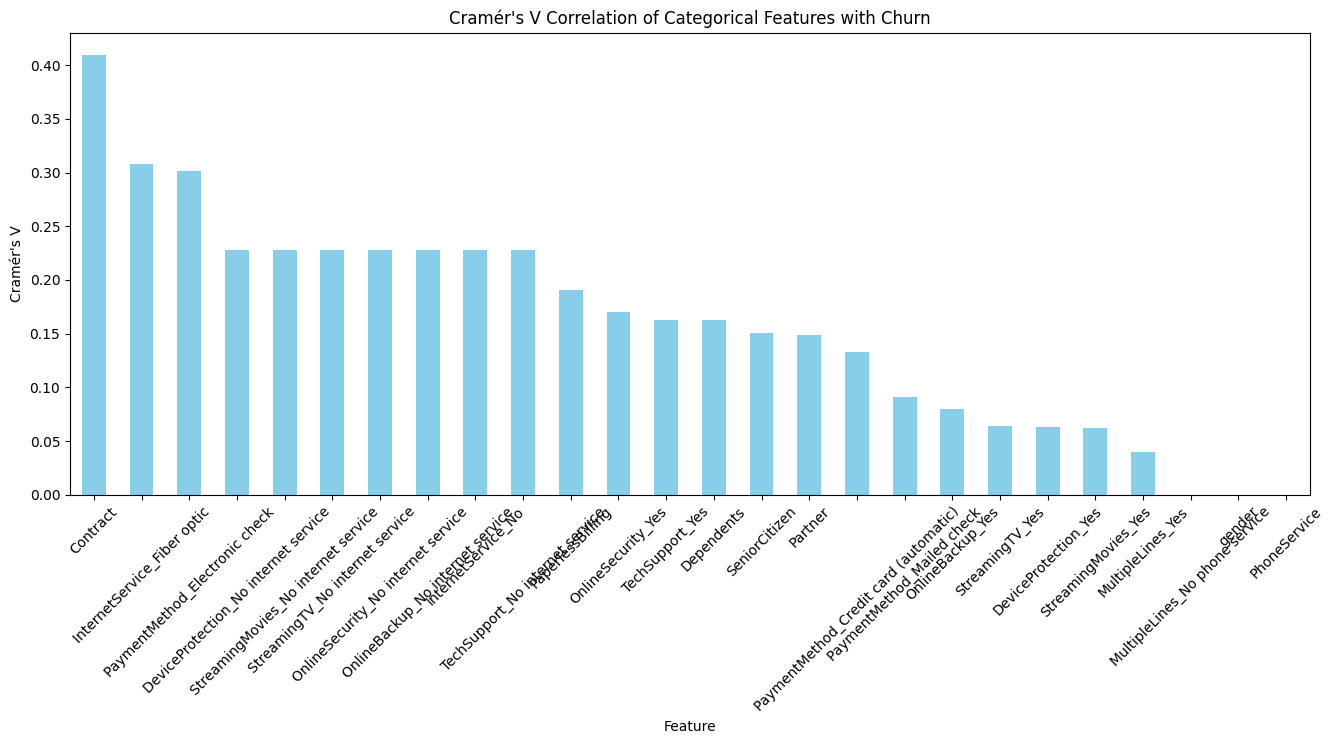

In [56]:
plt.figure(figsize=(16, 6))
cramers_df.plot(kind='bar', color='skyblue')
plt.title("Cramér's V Correlation of Categorical Features with Churn")
plt.ylabel("Cramér's V")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

In [57]:
'Contract','tenure',

('Contract', 'tenure')

In [58]:
final_df = clean_df[[
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges',
    'tenure',
    'MultipleLines_No phone service',
    'MultipleLines_Yes',
    'InternetService_Fiber optic',
    'InternetService_No',
    'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes',
    'OnlineBackup_No internet service',
    'OnlineBackup_Yes',
    'DeviceProtection_No internet service',
    'DeviceProtection_Yes',
    'TechSupport_No internet service',
    'TechSupport_Yes',
    'StreamingTV_No internet service',
    'StreamingTV_Yes',
    'StreamingMovies_No internet service',
    'StreamingMovies_Yes',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
    'Churn'
]]



In [59]:
final_df.shape

(7021, 27)

In [60]:
final_df

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,1,-1.176789,-0.995855,-1.282728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,-0.278879,-0.175276,0.062387,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,-0.378647,-0.961003,-1.241967,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,-0.744462,-0.196893,0.510759,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0.186704,-0.942032,-1.241967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0.652287,-0.130717,-0.345224,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
7039,0,1,1,1,1.284150,2.239258,1.611307,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0
7040,0,1,1,1,-1.176789,-0.856004,-0.875118,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7041,1,1,0,1,0.319728,-0.873651,-1.160445,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


**6. Training and Test data Split**

In [61]:
# Splitting the features and target
x = final_df.drop('Churn',axis=1)
y = final_df['Churn']

In [62]:
# split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
print(y_train.shape)

(5616,)


In [64]:
print(y_train.value_counts())

Churn
0    4111
1    1505
Name: count, dtype: int64


**Synthetic Minority Oversampling Thechnique(SMOTE)**

In [65]:
smote = SMOTE()

In [66]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [67]:
print(y_train_smote.shape)

(8222,)


In [68]:
print(y_train_smote.value_counts())

Churn
1    4111
0    4111
Name: count, dtype: int64


**7. Model Training**

In [69]:
# Dictionary of Model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

In [70]:
# Dictionary to store the cross validation result
cv_scores = {}

# Perform 3_fold cross validation for each model
for model_name, model in models.items():
  # print(model_name)
  # print(model)
  # print("-"*500)
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")*100
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 77.22
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 84.17
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 82.15
--------------------------------------------------
Training Logistic Regression with default parameters
Logistic Regression cross-validation accuracy: 78.62
--------------------------------------------------


Random Forest gives the highest accuracy compared to other models with default parameters

In [71]:
rfc = RandomForestClassifier(random_state=42)

In [72]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [73]:
print(y_test.value_counts())

Churn
0    1053
1     352
Name: count, dtype: int64


**8. Model Evaluation**

In [74]:
# evaluate on test data
y_test_pred = rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7551601423487544
Confsuion Matrix:
 [[848 205]
 [139 213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1053
           1       0.51      0.61      0.55       352

    accuracy                           0.76      1405
   macro avg       0.68      0.71      0.69      1405
weighted avg       0.77      0.76      0.76      1405



In [75]:
 # save the trained model as a pickle file
model_data = {"model": rfc, "features_names": x.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data, f)
loaded_model = model_data["model"]
feature_names = model_data["features_names"]

with open("onehot_encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

with open("binary_encoders.pkl", "rb") as f:
  binary_encoders = pickle.load(f)

with open("scaler.pkl", "rb") as f:
  scaler = pickle.load(f)

**9. Load the saved model and build a Predictive System**

In [76]:
customer_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_df = pd.DataFrame([customer_data])
print(input_df.head())

# encode categorical features using the saved encoders

# Label encode binary columns
binary_encoders_df = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_encoders_df:
  if col in input_df.columns:
    input_df[col] = binary_encoders[col].transform(input_df[col])

# One-hot encode multi-class columns
multi_class_cols = [
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaymentMethod'
]
for col in encoders:
    if col in input_df.columns:
        col_data = input_df[[col]]
        encoded = encoders[col].transform(col_data)
        encoded_df = pd.DataFrame(
            encoded,
            columns=encoders[col].get_feature_names_out([col]),
            index=input_df.index
        )
        input_df = pd.concat([input_df.drop(columns=[col]), encoded_df], axis=1)

# Scale numerical features
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
input_df[num_cols] = scaler.transform(input_df[num_cols])

# Add missing columns with 0
for col in model_data['features_names']:
    if col not in input_df.columns:
        input_df[col] = 0

# Ensure column order matches training
input_df = input_df[model_data['features_names']]


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [77]:
# Predict class label (0 or 1)
prediction = loaded_model.predict(input_df)

# Predict class probabilities (array of [prob_no_churn, prob_churn])
pred_prob = loaded_model.predict_proba(input_df)

print("Raw prediction output:", prediction)
print("Prediction probabilities:", pred_prob)

# Interpret prediction
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")

# Show probability of churn (class 1)
print(f"Probability of Churn: {pred_prob[0][1]:.4f}")

Raw prediction output: [0]
Prediction probabilities: [[0.65 0.35]]
Prediction: No Churn
Probability of Churn: 0.3500
